# CE9010 Introduction To Data Analysis

## Group 3

Student Name  |  Matric No  
:-:|:-:
Say Yueyang, Symus|U1922016K   
He Zeqing|U1722721G
Kwek Yan Qing|U1740743J   

---

# Background

Haze is one major form of air pollution that Singaporeans face annually. The presence of haze is attributed to the forest fires in Sumatra, Indonesia. Due to the increase in demand of commercial crops, Indonesian farmers have resorted to shifting agriculture, which includes the large-scale slash-and-burn of forest land to produce fertile planting grounds. The resulting air pollution is then spread across the region by the climatic phenomenon El Nino, enveloping Singapore in a blanket of haze and affecting the overall health of Singaporeans. In 2020, Indonesia fires torched approximately 207,000 hectares of forests from January to September. While the area is smaller compared to previous years, the burning resulted in a US$5.2 billion cost towards the Indonesian economy, and the occurrence of toxic smog over the city.

**References:**
- [Haze Pollution](https://eresources.nlb.gov.sg/infopedia/articles/SIP_2013-08-30_185150.html#:~:text=Forest%20fires%20in%20Sumatra%2C%20Indonesia,of%20the%20haze%20in%20Singapore.&text=Strong%20winds%20during%20the%20southwest,such%20fires%20throughout%20Southeast%20Asia.)
- [Commentary: Little smoke this haze season – but fires rage on in Indonesia](https://www.channelnewsasia.com/news/commentary/indonesia-forest-fire-peat-haze-palm-oil-jokowi-omnibus-bill-13533700)

# Objective

The objective of our study is to predict the possible intensity of future hotspots in South East Asia, including Indonesia.
Hopefully, this study will be able to support further research in estimating the possibility and severity of the occurrences of haze in Singapore.

Our study will be conducted with the relevant data on forest fires in South East Asia. Our dataset is obtained from the National Aeronautics and Space Administration (NASA)'s Fire Information for Resource Management System (FIRMS). It contains both geographical and technical data extracted from the Visible Infrared Imaging Radiometer Suite (VIIRS) sensor aboard their NOAA-20 weather satellite.

The table below describes each data available in our dataset:

| Data | Description |
| -: | :- |
| latitude | Indicates the latitude of fire pixel. |
| longitude	| Indicates the longitude of fire pixel. |
| bright_ti4 | Indicates the VIIRS I-4 Channel brightness temperature of the fire pixel. |
| scan | Indicates the  Along Scan pixel size. |
| track	| Indicates the Along Track pixel size.  |
| acq_date | Indicates the date of the acquired data. |
| acq_time | Indicates the time of the acquired data. |
| satellite | Indicates if the scan was done by the satellite (boolean values). |
| confidence | Indicates the confidence level of the data collected. |
| version | Indicates the version and source of data processing. |
| bright_ti5 | Indicates the VIIRS I-5 Channel brightness temperature of the fire pixel. |
| frp | Indicates the Fire Radiative Power (Detected thermal strength of the fire). |
| daynight | Indicates whether if it's daytime fire or nighttime fire. |

**References:**
- [Fire Information for Resource Management System](https://firms2.modaps.eosdis.nasa.gov/)
- [Visible Infrared Imaging Radiometer Suite](https://en.wikipedia.org/wiki/Visible_Infrared_Imaging_Radiometer_Suite)
- [Attribute Fields](https://earthdata.nasa.gov/earth-observation-data/near-real-time/firms/v1-vnp14imgt#ed-viirs-375m-attributes)

---

# Table of Contents

1. [Setup](#1-|-Setup)
2. [Dataset Summaries](#2-|-Dataset-Summaries)
3. [Exploratory Data Analysis](#3-|-Exploratory-Data-Analysis)
4. [Data Pre-Preprocessing](#4-|-Data-Pre-Processing)
5. [Data Analysis](#5-|-Data-Analysis)
6. [Results Analysis](#6-|-Results-Analysis)

# 1 | Setup 

## 1.1 | Setup on Anaconda Prompt/local computer

1. Ensure that the environment.yml file accompanying this notebook is located in the same directory as the notebook. <br>
2. Open Anaconda Prompt, and in Anaconda Prompt, navigate to the directory where the notebook was downloaded. <br>
3. In Anaconda Prompt, enter the following line of code:
> conda env create -f environment.yml

4. In Anaconda Prompt, enter the following line of code:
> conda info --envs

If installation of the environment is successful, you will see the environment 'CE9010_2021_Group3' listed in the list of environments.

5. Activate the notebook: 
> conda activate CE9010_2021_Group3

6. Run Jupyter Notebook 
> jupyter notebook

## 1.2 | Setup on Google Colab
Run the following cells to 


1.   !Pip install all the required packages
2.   Setup connection to Google Drive as your directory (Optional, for accessing files)



In [1]:
# Install required conda packages in the current Jupyter kernel
# for use on google colab, since it doesn't recognize conda packages
import sys
!pip install numpy
!pip install seaborn
!pip install plotly
!pip install pandas
!pip install geopandas
!pip install rtree
!pip install pygeos
!pip install imageio
!pip3 install rtree

In [2]:
# Set up google drive to be the working directory
from google.colab import drive # import drive from google colab
 
ROOT = "/content/drive/"     # default location for the drive
print(ROOT)                 # print content of ROOT (Optional)
 
drive.mount(ROOT)           # we mount the google drive at /content/drive

/content/drive/
Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
%pwd #check that it is correctly mounted
%ls #list all the directories available

drive/  sample_data/


In [4]:
#Set github repo path
# import join used to join ROOT path and MY_GOOGLE_DRIVE_PATH
from os.path import join 
# path to your project on Google Drive
MY_GOOGLE_DRIVE_PATH = "/content/drive/MyDrive/rootCE9010/repo" 
 
PROJECT_PATH = join(ROOT, MY_GOOGLE_DRIVE_PATH)
 
# It's good to print out the value if you are not sure 
print("PROJECT_PATH: ", PROJECT_PATH)

%cd {PROJECT_PATH}

PROJECT_PATH:  /content/drive/MyDrive/rootCE9010/repo
/content/drive/MyDrive/rootCE9010/repo


In [5]:
%pwd
%ls

'CE9010 Project Presentation.pptx'
 content/
 data_binned.csv
 DataViz.ipynb
 data_wcountries.csv
 environment.yml
 group3_notebook_CE9010_2021_v1.ipynb
'Ideas for Project.gdoc'
'Project (5) (3).ipynb'
'Project (5).ipynb'
'Project (5).ipynb.bak'
"Project_Atticus's copy_polydoesntwork.ipynb"
 Project.ipynb
'Project_logreg branch.ipynb'
'Project_models branch.ipynb'
 README.md
 Template.ipynb
 testnotebook.ipynb
 tree.dot
 tree.png


## 1.3 | Import modules
Run this to import all the modules required, regardless of what environment you are running in. Make sure that the imports have no errors before proceeding.

In [7]:
# Import required modules
import os
try:
    import pandas as pd
    import plotly.express as px
    from matplotlib import pyplot as plt
    from IPython.display import IFrame,Image
    import seaborn as sns
    import numpy as np
    import imageio
    import geopandas as gpd
    import graphviz
    # import rtree
    # import pygeos
    print ("All modules imported successfully.")
except ImportError:
    print ("One or more modules not imported!")
    print ("Please check that all dependencies are installed.")

# Directory to store local content for loading of interactive images
if not os.path.exists("content"):
    os.mkdir("content")
# Clean up past images
else:
    for f in os.listdir('./content'):
        os.remove(os.path.join('content', f))

All modules imported successfully.


# 2 | Dataset Summaries 

In [8]:
# Data Acquisition
# Import data from the Active Fire Dataset, VIIRS 375m / NOAA-20
data = pd.read_csv("https://firms2.modaps.eosdis.nasa.gov/data/active_fire/noaa-20-viirs-c2/csv/J1_VIIRS_C2_SouthEast_Asia_7d.csv",sep=',')
print (data.shape) # dimensions
data[:5]

(42687, 13)


,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,confidence,version,bright_ti5,frp,daynight
0,-10.12388,150.08504,331.3,0.56,0.43,2021-04-05,348,1,nominal,2.0NRT,289.8,1.9,D
1,-9.58054,148.63440,332.8,0.47,0.40,2021-04-05,348,1,nominal,2.0NRT,295.6,2.9,D
2,-8.93539,147.98267,331.6,0.45,0.39,2021-04-05,348,1,nominal,2.0NRT,293.0,3.5,D
3,-6.91190,146.36081,336.8,0.41,0.37,2021-04-05,348,1,nominal,2.0NRT,296.7,4.9,D
4,-5.19744,142.30423,333.3,0.42,0.37,2021-04-05,348,1,nominal,2.0NRT,296.7,3.9,D


In [9]:
# Check dataset
data.describe()

,latitude,longitude,bright_ti4,scan,track,acq_time,satellite,bright_ti5,frp
count,42687.000000,42687.000000,42687.000000,42687.000000,42687.000000,42687.000000,42687.0,42687.000000,42687.000000
mean,19.548987,100.043207,336.604758,0.461050,0.474085,794.121348,1.0,298.361258,14.996092
std,5.619779,8.016788,15.484531,0.083044,0.112036,398.481569,0.0,8.199681,32.298342
min,-11.497810,88.003890,207.900000,0.320000,0.360000,306.000000,1.0,248.600000,0.000000
25%,15.985970,94.001580,332.400000,0.400000,0.380000,624.000000,1.0,293.200000,3.300000
50%,20.594030,97.184360,337.400000,0.440000,0.440000,648.000000,1.0,298.700000,6.000000
75%,23.873590,105.298275,343.900000,0.510000,0.550000,718.000000,1.0,303.300000,12.900000
max,30.994860,155.201310,367.000000,0.800000,0.780000,2048.000000,1.0,376.900000,982.200000


In [10]:
# Check datatypes
data.dtypes

latitude      float64
longitude     float64
bright_ti4    float64
scan          float64
track         float64
acq_date       object
acq_time        int64
satellite       int64
confidence     object
version        object
bright_ti5    float64
frp           float64
daynight       object
dtype: object

In [11]:
# Check for null values (values contain no info and can be removed)
data.isnull().sum()

latitude      0
longitude     0
bright_ti4    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
confidence    0
version       0
bright_ti5    0
frp           0
daynight      0
dtype: int64

# 2b | Pre-visualization cleanup
Note that there are no null values --> Data is relatively clean. However, the datatypes of certain columns need to be corrected for appropriate data analysis.

In [12]:
# Concatenate acquisition date and time into a single column
data['period']=data['acq_date']+' '+data['acq_time'].astype(str) # this leaves a df with acq_date and acq_time still there
# data.drop(columns=['acq_date','acq_time'], inplace=True)
data['period']=pd.to_datetime(data['period'], format='%Y-%m-%d %H%M')
data['acq_date']=pd.to_datetime(data['period'].dt.date, format='%Y-%m-%d')
data['acq_time']=data['period'].dt.time
data.sort_values(by=['period'], inplace=True) # observe that without this code, time does not flow correctly in the animation

# Remove unnecessary data
data.drop(['satellite','version'],axis=1,inplace=True)

data[:10]

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,confidence,bright_ti5,frp,daynight,period
0,-10.12388,150.08504,331.3,0.56,0.43,2021-04-05,03:48:00,nominal,289.8,1.9,D,2021-04-05 03:48:00
1,-9.58054,148.63440,332.8,0.47,0.40,2021-04-05,03:48:00,nominal,295.6,2.9,D,2021-04-05 03:48:00
2,-8.93539,147.98267,331.6,0.45,0.39,2021-04-05,03:48:00,nominal,293.0,3.5,D,2021-04-05 03:48:00
3,-6.91190,146.36081,336.8,0.41,0.37,2021-04-05,03:48:00,nominal,296.7,4.9,D,2021-04-05 03:48:00
4,-5.19744,142.30423,333.3,0.42,0.37,2021-04-05,03:48:00,nominal,296.7,3.9,D,2021-04-05 03:48:00
5,-4.08090,145.03929,330.6,0.39,0.36,2021-04-05,03:48:00,nominal,287.8,0.9,D,2021-04-05 03:48:00
6,-3.73443,138.06323,327.8,0.45,0.47,2021-04-05,03:48:00,nominal,293.0,6.4,D,2021-04-05 03:48:00
7,-2.74974,134.50941,326.7,0.38,0.59,2021-04-05,03:48:00,nominal,291.0,2.1,D,2021-04-05 03:48:00
8,-2.43884,133.14189,329.6,0.47,0.64,2021-04-05,03:48:00,nominal,288.4,5.9,D,2021-04-05 03:48:00
9,-2.44006,133.13358,328.5,0.47,0.64,2021-04-05,03:48:00,nominal,289.4,3.3,D,2021-04-05 03:48:00


# 3 | Exploratory Data Analysis/Visualization
In this section, we shall be doing some preliminary visualization of our dataset.

<Figure size 432x288 with 0 Axes>

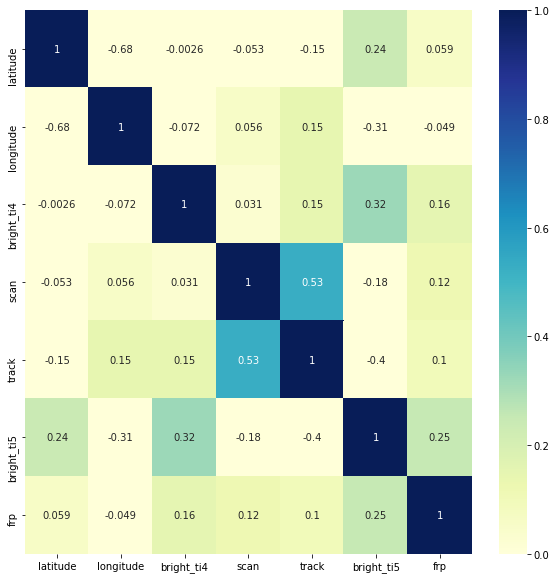

In [13]:
plt.figure(1)
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(data.corr(method='pearson'),vmin=0,cmap="YlGnBu",annot=True,ax=ax)

BUG: CELLS DO NOT WORK ON GITHUB; INTERACTIVE VISUALS <br>
Tested working in Jupyter and VSCode <br>
Github renders images statically and does not support interactive visuals

In [14]:
# Write animation to file
fig2 = px.scatter_geo(data, 
                    lat='latitude', 
                    lon='longitude', 
                    scope='asia',
                    center={'lat':2.2180,'lon':115.6628}, # centered to SEA
                    color='confidence',
                    animation_frame=data['period'].astype(str)) 
fig2.write_html('content/animation.html')
# TODO: Fix animation to have constant legend 

# Display animation
IFrame(src='content/animation.html', width=1080, height=720)

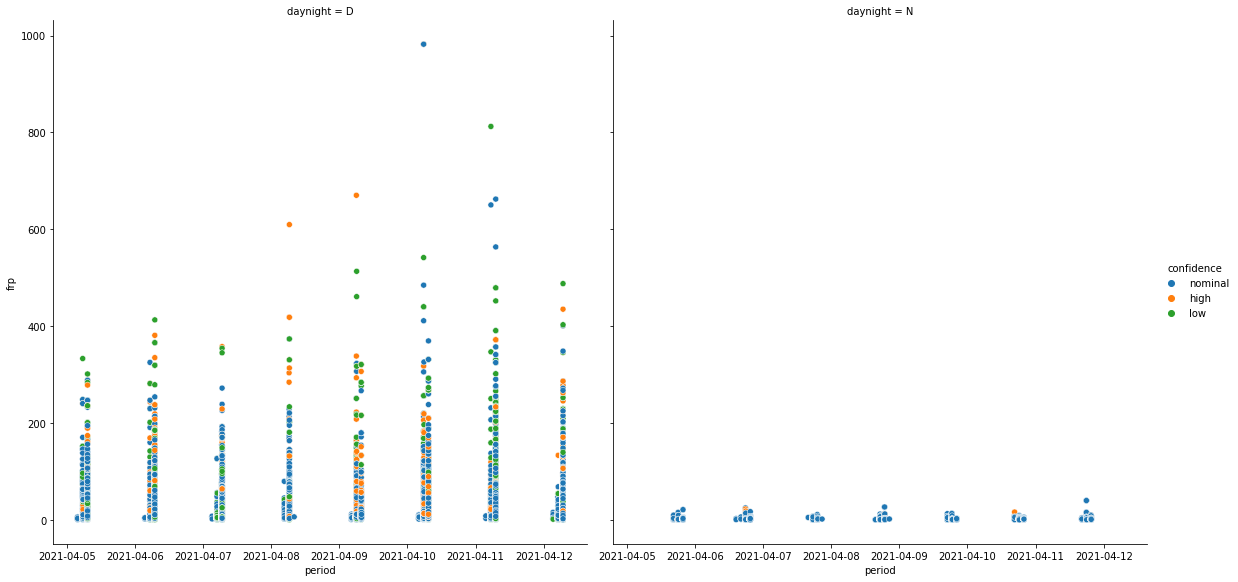

In [15]:
# FRP/confidence against time
sns.relplot(x="period", y="frp", hue="confidence", col="daynight", data=data, height=8)

We note that there seems to be some data where the gaps between data is small. Hence, this necessitates the merging of time data into hourly frames to better analyze patterns. 

In [16]:
# Processing data further to clean visualization

# Generate new DFs with times rounded down to the nearest hour
date_sorted = data
date_sorted['period'] = date_sorted['period'].dt.floor('H')
date_sorted_gb = date_sorted.groupby('acq_date') # returns a groupby object which can be called with below code

# [date_sorted.get_group(x) for x in date_sorted_gb.groups] # this displays all the dataframes

date_sorted.head(10)

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,confidence,bright_ti5,frp,daynight,period
0,-10.12388,150.08504,331.3,0.56,0.43,2021-04-05,03:48:00,nominal,289.8,1.9,D,2021-04-05 03:00:00
1,-9.58054,148.63440,332.8,0.47,0.40,2021-04-05,03:48:00,nominal,295.6,2.9,D,2021-04-05 03:00:00
2,-8.93539,147.98267,331.6,0.45,0.39,2021-04-05,03:48:00,nominal,293.0,3.5,D,2021-04-05 03:00:00
3,-6.91190,146.36081,336.8,0.41,0.37,2021-04-05,03:48:00,nominal,296.7,4.9,D,2021-04-05 03:00:00
4,-5.19744,142.30423,333.3,0.42,0.37,2021-04-05,03:48:00,nominal,296.7,3.9,D,2021-04-05 03:00:00
5,-4.08090,145.03929,330.6,0.39,0.36,2021-04-05,03:48:00,nominal,287.8,0.9,D,2021-04-05 03:00:00
6,-3.73443,138.06323,327.8,0.45,0.47,2021-04-05,03:48:00,nominal,293.0,6.4,D,2021-04-05 03:00:00
7,-2.74974,134.50941,326.7,0.38,0.59,2021-04-05,03:48:00,nominal,291.0,2.1,D,2021-04-05 03:00:00
8,-2.43884,133.14189,329.6,0.47,0.64,2021-04-05,03:48:00,nominal,288.4,5.9,D,2021-04-05 03:00:00
9,-2.44006,133.13358,328.5,0.47,0.64,2021-04-05,03:48:00,nominal,289.4,3.3,D,2021-04-05 03:00:00


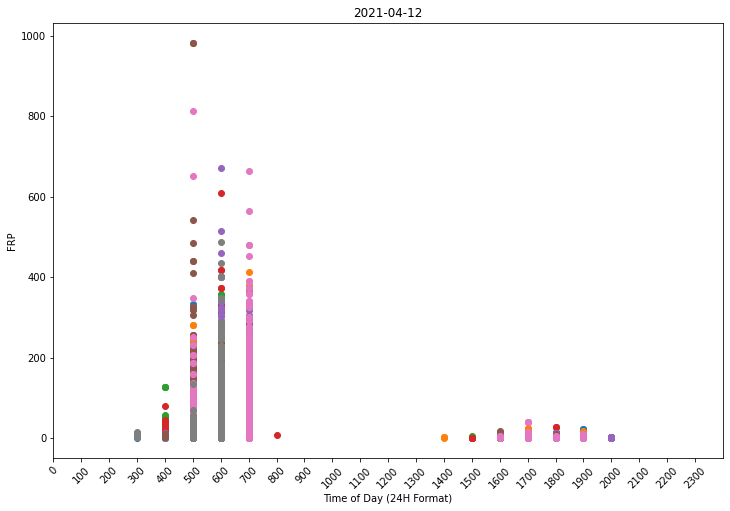

In [17]:
# Plot individual plots for every date
pd.options.mode.chained_assignment = None  # ignore warnings
# list_date = date_sorted['acq_date'].unique()

# Formatting of plot
fig3 = plt.figure(figsize=(12,8))
plt.xlabel('Time of Day (24H Format)')
plt.ylabel('FRP')
plt.xlim(0,2400)
plt.xticks(np.linspace(0,2300,num=24), rotation=45)

for x in date_sorted_gb.groups:
    plt.title(str(x.date()))

    # Data of plot
    current = date_sorted_gb.get_group(x) # iterate through groups
    current['acq_time'] = current['period'].dt.time # extract time
    current['acq_time'] = current['acq_time'].apply(str) # convert to type string
    current['acq_time'] = current['acq_time'].str.replace(':','').astype(int)/100 # convert to 24h format
    plt.scatter(current['acq_time'],current['frp'])
    plt.savefig('content/'+str(x.date())+'.png')

In [18]:
filenames = date_sorted['acq_date'].dt.date.unique().astype(str)
filenames = [(value+'.png') for value in filenames]

images = []
for filename in filenames:
    images.append(imageio.imread('content/'+filename))
imageio.mimwrite('content/dailyfrp.gif', images, format='gif', duration=1)

Image(url='content/dailyfrp.gif') 

Looking at the above visualizations, we can see that: 
- there tends to be a concentration of fire data within the same region
- most fires are detected in the day
- there seems to be a pattern in when the fires are detected within the same 7 day period

We also notice a few points where the data is seemingly in the middle of the ocean.

Consequently, this necessitates cleaning of data to remove unnecessary information. Feature selection is necessary. 

## look through @Atticus

# 4 | Data Pre-Processing

### 4.1 | Reformatting Features
Certain columns need to be reformatted into their appropriate data type for analysis. 

In particular, we will be converting categorical data with multiple classfications into dummy variables where each category is a binary variable. To do so, we shall be using a tool known as OneHotEncoding (OHE).

Dummy Variables: https://stats.idre.ucla.edu/spss/faq/coding-systems-for-categorical-variables-in-regression-analysis-2/

In [19]:
# Convert 'object' columns into appropriate dtype
data['confidence'].astype('category')
data['daynight'].astype('category') #data = raw_data

0        D
1        D
2        D
3        D
4        D
        ..
38955    D
38954    D
38953    D
38961    D
42686    D
Name: daynight, Length: 42687, dtype: category
Categories (2, object): ['D', 'N']

In [20]:
# Convert time into integers
data['acq_time'] = data['acq_time'].apply(str) # convert to type string
data['acq_time'] = data['acq_time'].str.replace(':','').astype(int)
data.head()

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,confidence,bright_ti5,frp,daynight,period
0,-10.12388,150.08504,331.3,0.56,0.43,2021-04-05,34800,nominal,289.8,1.9,D,2021-04-05 03:00:00
1,-9.58054,148.63440,332.8,0.47,0.40,2021-04-05,34800,nominal,295.6,2.9,D,2021-04-05 03:00:00
2,-8.93539,147.98267,331.6,0.45,0.39,2021-04-05,34800,nominal,293.0,3.5,D,2021-04-05 03:00:00
3,-6.91190,146.36081,336.8,0.41,0.37,2021-04-05,34800,nominal,296.7,4.9,D,2021-04-05 03:00:00
4,-5.19744,142.30423,333.3,0.42,0.37,2021-04-05,34800,nominal,296.7,3.9,D,2021-04-05 03:00:00


In [21]:
# Resetting index for OHE preparation
data.set_index('period', inplace=True)
data.reset_index(inplace=True)
data.head()

,period,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,confidence,bright_ti5,frp,daynight
0,2021-04-05 03:00:00,-10.12388,150.08504,331.3,0.56,0.43,2021-04-05,34800,nominal,289.8,1.9,D
1,2021-04-05 03:00:00,-9.58054,148.63440,332.8,0.47,0.40,2021-04-05,34800,nominal,295.6,2.9,D
2,2021-04-05 03:00:00,-8.93539,147.98267,331.6,0.45,0.39,2021-04-05,34800,nominal,293.0,3.5,D
3,2021-04-05 03:00:00,-6.91190,146.36081,336.8,0.41,0.37,2021-04-05,34800,nominal,296.7,4.9,D
4,2021-04-05 03:00:00,-5.19744,142.30423,333.3,0.42,0.37,2021-04-05,34800,nominal,296.7,3.9,D


## 4.2 | Reshaping the dataset (KIV)
For better analysis, we wanted to reshape the dataset such that we had more uniform types of features. We ended up with two different datasets to use in our model.


### 4.2.1 | Adding location information
As our dataset was limited in useful features, we wanted to add supplementary information. Using a geopandas package, we were able to get more information about the location of the fire using latitude and longitude. We were able to add information like the country, continent and estimated population of in the area, which could be useful features to determine the intensity of the fire.

In [30]:
# Converting latitude and longitude values to location values

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
#gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data['longitude'], data['latitude']), crs={'init': 'epsg:4326'})
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data['longitude'], data['latitude']), crs='epsg:4326')
result = gpd.sjoin(gdf, world, how='left')
result.head() 
#result = location_data 

,period,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,confidence,bright_ti5,frp,daynight,geometry,index_right,pop_est,continent,name,iso_a3,gdp_md_est
0,2021-04-05 03:00:00,-10.12388,150.08504,331.3,0.56,0.43,2021-04-05,34800,nominal,289.8,1.9,D,POINT (150.08504 -10.12388),7.0,6909701.0,Oceania,Papua New Guinea,PNG,28020.0
1,2021-04-05 03:00:00,-9.58054,148.63440,332.8,0.47,0.40,2021-04-05,34800,nominal,295.6,2.9,D,POINT (148.63440 -9.58054),7.0,6909701.0,Oceania,Papua New Guinea,PNG,28020.0
2,2021-04-05 03:00:00,-8.93539,147.98267,331.6,0.45,0.39,2021-04-05,34800,nominal,293.0,3.5,D,POINT (147.98267 -8.93539),7.0,6909701.0,Oceania,Papua New Guinea,PNG,28020.0
3,2021-04-05 03:00:00,-6.91190,146.36081,336.8,0.41,0.37,2021-04-05,34800,nominal,296.7,4.9,D,POINT (146.36081 -6.91190),7.0,6909701.0,Oceania,Papua New Guinea,PNG,28020.0
4,2021-04-05 03:00:00,-5.19744,142.30423,333.3,0.42,0.37,2021-04-05,34800,nominal,296.7,3.9,D,POINT (142.30423 -5.19744),7.0,6909701.0,Oceania,Papua New Guinea,PNG,28020.0


In [31]:
# Remove irrelevant geometric information and NaN values
result.drop(['geometry','index_right','iso_a3','gdp_md_est'],axis=1,inplace=True)
result.head()

,period,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,confidence,bright_ti5,frp,daynight,pop_est,continent,name
0,2021-04-05 03:00:00,-10.12388,150.08504,331.3,0.56,0.43,2021-04-05,34800,nominal,289.8,1.9,D,6909701.0,Oceania,Papua New Guinea
1,2021-04-05 03:00:00,-9.58054,148.63440,332.8,0.47,0.40,2021-04-05,34800,nominal,295.6,2.9,D,6909701.0,Oceania,Papua New Guinea
2,2021-04-05 03:00:00,-8.93539,147.98267,331.6,0.45,0.39,2021-04-05,34800,nominal,293.0,3.5,D,6909701.0,Oceania,Papua New Guinea
3,2021-04-05 03:00:00,-6.91190,146.36081,336.8,0.41,0.37,2021-04-05,34800,nominal,296.7,4.9,D,6909701.0,Oceania,Papua New Guinea
4,2021-04-05 03:00:00,-5.19744,142.30423,333.3,0.42,0.37,2021-04-05,34800,nominal,296.7,3.9,D,6909701.0,Oceania,Papua New Guinea


In [32]:
# Check for null values
result.isnull().sum()

period          0
latitude        0
longitude       0
bright_ti4      0
scan            0
track           0
acq_date        0
acq_time        0
confidence      0
bright_ti5      0
frp             0
daynight        0
pop_est       862
continent     862
name          862
dtype: int64

In [33]:
# Above means there are null values present. 
# Solution: remove rows
result.dropna(inplace=True)
result.reset_index(drop=True) # reset index of dataframe to account for missing values
result.isnull().sum()

period        0
latitude      0
longitude     0
bright_ti4    0
scan          0
track         0
acq_date      0
acq_time      0
confidence    0
bright_ti5    0
frp           0
daynight      0
pop_est       0
continent     0
name          0
dtype: int64

In [34]:
# Visualize clean dataset
result.head()

,period,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,confidence,bright_ti5,frp,daynight,pop_est,continent,name
0,2021-04-05 03:00:00,-10.12388,150.08504,331.3,0.56,0.43,2021-04-05,34800,nominal,289.8,1.9,D,6909701.0,Oceania,Papua New Guinea
1,2021-04-05 03:00:00,-9.58054,148.63440,332.8,0.47,0.40,2021-04-05,34800,nominal,295.6,2.9,D,6909701.0,Oceania,Papua New Guinea
2,2021-04-05 03:00:00,-8.93539,147.98267,331.6,0.45,0.39,2021-04-05,34800,nominal,293.0,3.5,D,6909701.0,Oceania,Papua New Guinea
3,2021-04-05 03:00:00,-6.91190,146.36081,336.8,0.41,0.37,2021-04-05,34800,nominal,296.7,4.9,D,6909701.0,Oceania,Papua New Guinea
4,2021-04-05 03:00:00,-5.19744,142.30423,333.3,0.42,0.37,2021-04-05,34800,nominal,296.7,3.9,D,6909701.0,Oceania,Papua New Guinea


In [35]:
# One Hot Encoding
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')

ohe_confidence = pd.DataFrame(enc.fit_transform(result[['confidence']]).toarray())
ohe_confidence.columns = enc.get_feature_names(['confidence'])
#ohe_confidence.head()

ohe_daynight = pd.DataFrame(enc.fit_transform(result[['daynight']]).toarray())
ohe_daynight.columns = enc.get_feature_names(['daynight'])
# ohe_daynight.head()

ohe_continent = pd.DataFrame(enc.fit_transform(result[['continent']]).toarray())
ohe_continent.columns = enc.get_feature_names(['continent'])
# ohe_continent.head()

ohe_name = pd.DataFrame(enc.fit_transform(result[['name']]).toarray())
ohe_name.columns = enc.get_feature_names(['name'])
# ohe_name.head()


In [36]:
# Concatenate OHE variables with dataframe
new_data = pd.concat([result,ohe_confidence,ohe_daynight,ohe_continent,ohe_name], axis=1)
new_data.drop(['confidence', 'daynight','continent','name'], axis=1, inplace=True)
new_data.head()

,period,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,bright_ti5,frp,pop_est,confidence_high,confidence_low,confidence_nominal,daynight_D,daynight_N,continent_Asia,continent_Oceania,name_Bangladesh,name_Bhutan,name_Brunei,name_Cambodia,name_China,name_India,name_Indonesia,name_Laos,name_Malaysia,name_Myanmar,name_Nepal,name_Papua New Guinea,name_Philippines,name_Taiwan,name_Thailand,name_Vietnam
0,2021-04-05 03:00:00,-10.12388,150.08504,331.3,0.56,0.43,2021-04-05,34800.0,289.8,1.9,6909701.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2021-04-05 03:00:00,-9.58054,148.63440,332.8,0.47,0.40,2021-04-05,34800.0,295.6,2.9,6909701.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2021-04-05 03:00:00,-8.93539,147.98267,331.6,0.45,0.39,2021-04-05,34800.0,293.0,3.5,6909701.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2021-04-05 03:00:00,-6.91190,146.36081,336.8,0.41,0.37,2021-04-05,34800.0,296.7,4.9,6909701.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2021-04-05 03:00:00,-5.19744,142.30423,333.3,0.42,0.37,2021-04-05,34800.0,296.7,3.9,6909701.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [37]:
# Check datatypes of new dataframe
new_data.dtypes

period                   datetime64[ns]
latitude                        float64
longitude                       float64
bright_ti4                      float64
scan                            float64
track                           float64
acq_date                 datetime64[ns]
acq_time                        float64
bright_ti5                      float64
frp                             float64
pop_est                         float64
confidence_high                 float64
confidence_low                  float64
confidence_nominal              float64
daynight_D                      float64
daynight_N                      float64
continent_Asia                  float64
continent_Oceania               float64
name_Bangladesh                 float64
name_Bhutan                     float64
name_Brunei                     float64
name_Cambodia                   float64
name_China                      float64
name_India                      float64
name_Indonesia                  float64


In [38]:
# Standardization can only be done on numeric data - hence, columns not of int or float type should be removed.
new_data.drop(['period','acq_date','latitude','longitude'],axis=1,inplace=True)
new_data.dtypes

bright_ti4               float64
scan                     float64
track                    float64
acq_time                 float64
bright_ti5               float64
frp                      float64
pop_est                  float64
confidence_high          float64
confidence_low           float64
confidence_nominal       float64
daynight_D               float64
daynight_N               float64
continent_Asia           float64
continent_Oceania        float64
name_Bangladesh          float64
name_Bhutan              float64
name_Brunei              float64
name_Cambodia            float64
name_China               float64
name_India               float64
name_Indonesia           float64
name_Laos                float64
name_Malaysia            float64
name_Myanmar             float64
name_Nepal               float64
name_Papua New Guinea    float64
name_Philippines         float64
name_Taiwan              float64
name_Thailand            float64
name_Vietnam             float64
dtype: obj

In [39]:
new_data.dropna(inplace=True)

In [40]:
#create a dataset to reference to
data_mixed = new_data.copy()
data_mixed.to_csv('./data_wcountries.csv',index=False)

In [41]:
data_mixed.head()

,bright_ti4,scan,track,acq_time,bright_ti5,frp,pop_est,confidence_high,confidence_low,confidence_nominal,daynight_D,daynight_N,continent_Asia,continent_Oceania,name_Bangladesh,name_Bhutan,name_Brunei,name_Cambodia,name_China,name_India,name_Indonesia,name_Laos,name_Malaysia,name_Myanmar,name_Nepal,name_Papua New Guinea,name_Philippines,name_Taiwan,name_Thailand,name_Vietnam
0,331.3,0.56,0.43,34800.0,289.8,1.9,6909701.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,332.8,0.47,0.40,34800.0,295.6,2.9,6909701.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,331.6,0.45,0.39,34800.0,293.0,3.5,6909701.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,336.8,0.41,0.37,34800.0,296.7,4.9,6909701.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,333.3,0.42,0.37,34800.0,296.7,3.9,6909701.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### 4.2.2 | Converting continuous features into categorical features
To make the model more accurate, we attempted to convert continuous features into categorical features by splitting the datapoints into 5 bins of equally spaced out ranges of continuous data. We will then use OHE to convert these bins into dummy variables. This is so that we can simplify and standardize the type of features which is fed to the models by converting all the features (X) to binary variables. We will be training our models using this preprocessed fully categorical dataset, as well as the mixed continous-categorical dataset.

In [42]:
# Generate labels for modified dataset
mod_var = [[],[],[],[],[],[]]
var = ['bright_ti4','scan','track','bright_ti5','pop_est']
quantile = ['_20p','_40p','_60p','_80p','_100p']
quartile = ['_25p','_50p','_75p','_100p']

for x in range(len(var)):
    mod_var[x] = [var[x] + value for value in quantile]
    print (mod_var[x])
mod_var[-1]=['acq_time'+value for value in quartile]
print (mod_var[-1])

['bright_ti4_20p', 'bright_ti4_40p', 'bright_ti4_60p', 'bright_ti4_80p', 'bright_ti4_100p']
['scan_20p', 'scan_40p', 'scan_60p', 'scan_80p', 'scan_100p']
['track_20p', 'track_40p', 'track_60p', 'track_80p', 'track_100p']
['bright_ti5_20p', 'bright_ti5_40p', 'bright_ti5_60p', 'bright_ti5_80p', 'bright_ti5_100p']
['pop_est_20p', 'pop_est_40p', 'pop_est_60p', 'pop_est_80p', 'pop_est_100p']
['acq_time_25p', 'acq_time_50p', 'acq_time_75p', 'acq_time_100p']


In [45]:
# Convert input to categorical input

data_bright_ti4,data_bright_ti4_intervals=pd.qcut(new_data['bright_ti4'], 5, retbins=True,
                        labels=mod_var[0])
data_scan,data_scan_intervals=pd.qcut(new_data['scan'], 5, retbins=True,
                        labels=mod_var[1])
data_track,data_track_intervals=pd.qcut(new_data['track'], 5, retbins=True,
                        labels=mod_var[2])
data_bright_ti5,data_bright_ti5_intervals=pd.qcut(new_data['bright_ti5'], 5, retbins=True,
                        labels=mod_var[3])
#data_pop_est,data_pop_est_intervals=pd.qcut(new_data['pop_est'], 5, retbins=True,
#                        labels=mod_var[4])
data_acq_time,data_acq_time_intervals=pd.qcut(new_data['acq_time'], 4, retbins=True,
                        labels=mod_var[5])

In [46]:
#Concatenate all to a single DF
#cont_var = pd.concat([data_bright_ti4,data_scan,data_track,data_bright_ti5,data_pop_est,data_acq_time], axis=1)
cont_var = pd.concat([data_bright_ti4,data_scan,data_track,data_bright_ti5,data_acq_time], axis=1)

In [47]:
cont_var.dropna(inplace= True)

In [48]:
# One-Hot Encoding
ohe_bright_ti4 = pd.DataFrame(enc.fit_transform(cont_var[['bright_ti4']]).toarray())
ohe_bright_ti4.columns = enc.get_feature_names(['bright_ti4'])

ohe_scan = pd.DataFrame(enc.fit_transform(cont_var[['scan']]).toarray())
ohe_scan.columns = enc.get_feature_names(['scan'])

ohe_track = pd.DataFrame(enc.fit_transform(cont_var[['track']]).toarray())
ohe_track.columns = enc.get_feature_names(['track'])

ohe_bright_ti5 = pd.DataFrame(enc.fit_transform(cont_var[['bright_ti5']]).toarray())
ohe_bright_ti5.columns = enc.get_feature_names(['bright_ti5'])

#ohe_pop_est = pd.DataFrame(enc.fit_transform(cont_var[['pop_est']]).toarray())
#ohe_pop_est.columns = enc.get_feature_names(['pop_est'])

ohe_acq_time = pd.DataFrame(enc.fit_transform(cont_var[['acq_time']]).toarray())
ohe_acq_time.columns = enc.get_feature_names(['acq_time'])

In [49]:
new_data.drop(['bright_ti4','scan','track','acq_time','bright_ti5','pop_est'],axis=1,inplace=True)
#new_data = pd.concat([ohe_bright_ti4,ohe_scan,ohe_track,ohe_bright_ti5,ohe_pop_est,ohe_acq_time,new_data],axis=1)
new_data = pd.concat([ohe_bright_ti4,ohe_scan,ohe_track,ohe_bright_ti5,ohe_acq_time,new_data],axis=1)

In [50]:
new_data.head()

,bright_ti4_bright_ti4_100p,bright_ti4_bright_ti4_20p,bright_ti4_bright_ti4_40p,bright_ti4_bright_ti4_60p,bright_ti4_bright_ti4_80p,scan_scan_100p,scan_scan_20p,scan_scan_40p,scan_scan_60p,scan_scan_80p,track_track_100p,track_track_20p,track_track_40p,track_track_60p,track_track_80p,bright_ti5_bright_ti5_100p,bright_ti5_bright_ti5_20p,bright_ti5_bright_ti5_40p,bright_ti5_bright_ti5_60p,bright_ti5_bright_ti5_80p,acq_time_acq_time_100p,acq_time_acq_time_25p,acq_time_acq_time_50p,acq_time_acq_time_75p,frp,confidence_high,confidence_low,confidence_nominal,daynight_D,daynight_N,continent_Asia,continent_Oceania,name_Bangladesh,name_Bhutan,name_Brunei,name_Cambodia,name_China,name_India,name_Indonesia,name_Laos,name_Malaysia,name_Myanmar,name_Nepal,name_Papua New Guinea,name_Philippines,name_Taiwan,name_Thailand,name_Vietnam
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.9,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.9,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,3.5,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,4.9,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,3.9,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [51]:
new_data.dropna(inplace=True)

In [52]:
#create a dataset to reference to
data_binned = new_data.copy()
data_binned.to_csv('./data_binned.csv',index=False) 

In [53]:
data_binned.head()

,bright_ti4_bright_ti4_100p,bright_ti4_bright_ti4_20p,bright_ti4_bright_ti4_40p,bright_ti4_bright_ti4_60p,bright_ti4_bright_ti4_80p,scan_scan_100p,scan_scan_20p,scan_scan_40p,scan_scan_60p,scan_scan_80p,track_track_100p,track_track_20p,track_track_40p,track_track_60p,track_track_80p,bright_ti5_bright_ti5_100p,bright_ti5_bright_ti5_20p,bright_ti5_bright_ti5_40p,bright_ti5_bright_ti5_60p,bright_ti5_bright_ti5_80p,acq_time_acq_time_100p,acq_time_acq_time_25p,acq_time_acq_time_50p,acq_time_acq_time_75p,frp,confidence_high,confidence_low,confidence_nominal,daynight_D,daynight_N,continent_Asia,continent_Oceania,name_Bangladesh,name_Bhutan,name_Brunei,name_Cambodia,name_China,name_India,name_Indonesia,name_Laos,name_Malaysia,name_Myanmar,name_Nepal,name_Papua New Guinea,name_Philippines,name_Taiwan,name_Thailand,name_Vietnam
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.9,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.9,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,3.5,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,4.9,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,3.9,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## 4.2b | Reshaped Dataset - Conclusion 
With that, we have 2 preprocessed datasets that we can use to train our models:


1.   Mixed Dataset - Binary Features + Continuous Features Mix
2.   Binned Dataset - All Binary Features



## 4.3 | Feature Selection

With our two pre-processed datasets, we shall do some feature selection to make our models run faster and smoother. 

In [54]:
# Mixed Dataset
Xmix = data_mixed.drop(['frp'], axis=1)
ymix = pd.DataFrame(data_mixed['frp'])

# Binned Dataset
Xbin = data_binned.drop(['frp'], axis=1)
ybin = pd.DataFrame(data_binned['frp'])

### 4.3.1 | Covariance Matrix + Heatmap

In [60]:
##z-scoring standardization

from sklearn.preprocessing import StandardScaler, Normalizer
def standardize(df):
  # create a scaler object
  std_scaler = StandardScaler()
  # fit and transform the data
  return pd.DataFrame(std_scaler.fit_transform(df), columns=df.columns)


#X_cleaned  = standardize(data_mixed)
X_cleaned  = data_binned
X_cleaned.head()

,bright_ti4_bright_ti4_100p,bright_ti4_bright_ti4_20p,bright_ti4_bright_ti4_40p,bright_ti4_bright_ti4_60p,bright_ti4_bright_ti4_80p,scan_scan_100p,scan_scan_20p,scan_scan_40p,scan_scan_60p,scan_scan_80p,track_track_100p,track_track_20p,track_track_40p,track_track_60p,track_track_80p,bright_ti5_bright_ti5_100p,bright_ti5_bright_ti5_20p,bright_ti5_bright_ti5_40p,bright_ti5_bright_ti5_60p,bright_ti5_bright_ti5_80p,acq_time_acq_time_100p,acq_time_acq_time_25p,acq_time_acq_time_50p,acq_time_acq_time_75p,frp,confidence_high,confidence_low,confidence_nominal,daynight_D,daynight_N,continent_Asia,continent_Oceania,name_Bangladesh,name_Bhutan,name_Brunei,name_Cambodia,name_China,name_India,name_Indonesia,name_Laos,name_Malaysia,name_Myanmar,name_Nepal,name_Papua New Guinea,name_Philippines,name_Taiwan,name_Thailand,name_Vietnam
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.9,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.9,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,3.5,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,4.9,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,3.9,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


<Figure size 432x288 with 0 Axes>

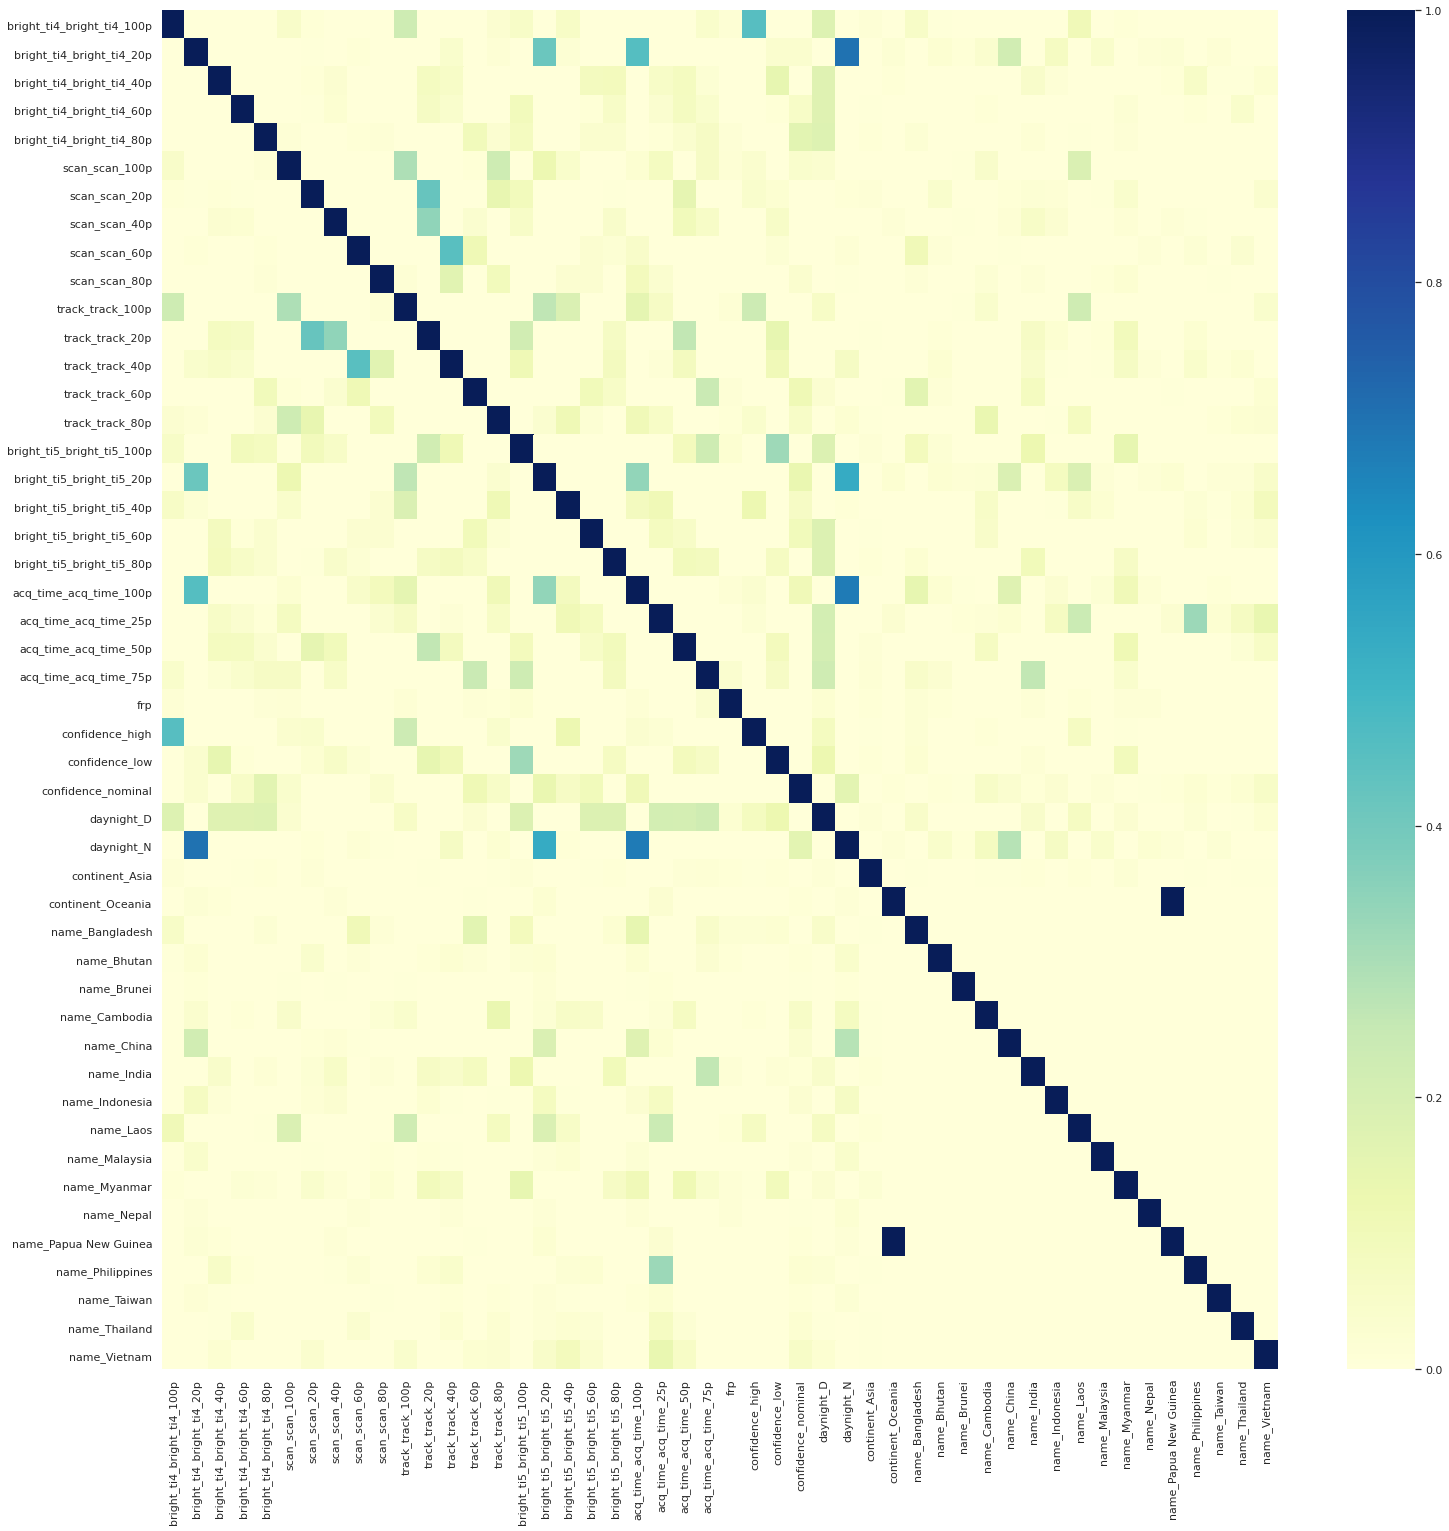

In [62]:
Xdata = X_cleaned.copy()
plt.figure(1)
fig, ax = plt.subplots(figsize=(25,25)) 
sns.set()
ax = sns.heatmap(Xdata.corr(method='pearson'),vmin=0,cmap="YlGnBu",annot=False,ax=ax)

In [ ]:
# add binned section for heatmap

### 4.3.2 | Random Forest Model

Another model we utilised is the Random Forest model, which comprises of a user-determined number of decision trees. 

It works through the following steps:
1. A random sample is selected from the given dataset.
2. From this random sample, a decision tree is crafted. Assuming there are n random samples selected, there will be n decision trees. (The argument n_estimators allows the user to choose the value of n.)
3. When the Random Forest model makes a prediction, each decision tree will then produce a predicted result. Voting will commence for all n decision trees.
4. Once all n predicted results have been voted upon, the highest voted result is the final prediction.

The model has proven to be both accurate and robust due to the number of decision trees involved; additionally, due to it taking the average of all predictions by the decision trees, it is not affected by overfitting.

Sources: 
- [Random Forest in Python](https://towardsdatascience.com/random-forest-in-python-24d0893d51c0)
- [Understanding Random Forests Classifiers in Python](https://www.datacamp.com/community/tutorials/random-forests-classifier-python)

In [68]:
##convert to numpy to use with randomforest

X = Xmix
y = ymix

# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 20 decision trees
rf = RandomForestRegressor(n_estimators = 20, random_state = 42)
# Train the model on training data
rf.fit(X.values, y.values.ravel());

# get importance
importance = rf.feature_importances_
# print(importance)
# summarize feature importance
important_features_dict = {}
for i,v in enumerate(importance):
    important_features_dict[X.columns[i]] = v

sorted_values = sorted(important_features_dict.values(),reverse=True) # Sort the values
sorted_dict = {}

for i in sorted_values:
    for k in important_features_dict.keys():
        if important_features_dict[k] == i:
            sorted_dict[k] = important_features_dict[k]
            break
         
toplist = []
for i in sorted_dict:
    #print(i,sorted_dict[i])
    toplist.append(i)

first3vals = toplist[:3]
print("The top 3 factors correlating to the Fire Radiative Power are %s, %s, %s" % ( first3vals[0], first3vals[1] , first3vals[2] ))

The top 3 factors correlating to the Fire Radiative Power are bright_ti5, bright_ti4, scan


In [ ]:
#binned
#add k-best back in?

# 5 | Data Analysis - Supervised Learning Models
In this section, we shall be using our dataset to train three different models to attempt to predict a value of FRP (Fire Radiative Power). Fire Radiative Power is the detected thermal energy of the fire, which is indicative of the size and intensity of the wildfire.

<p> From the feature selection, the relevant features that we are using to predict FRP values would be bright_ti4 and bright_ti5, and a high confidence of ths satelite in the conditions for measurement.

In [66]:
#place datasets here
#datasets after feature selection

#TO-DO : 
data_xs_mixed = data_mixed[['bright_ti4', 'bright_ti5', 'scan' ]]
data_y_mixed = data_mixed[['frp']]

data_xs_binned = data_binned.drop(['frp'], axis=1)
data_y_binned = data_binned[['frp']]

def printoutdata(data_xs, data_y, dataset_name = "Dataset"):
  print(dataset_name)
  print("Data_x :\n" , data_xs[:5])
  print("Data_y :\n", data_y[:5])
  print("Data_shape [x,y]:", data_xs.shape, data_y.shape)
  print(data_xs.dtypes)
  print("\n")

printoutdata(data_xs_mixed, data_y_mixed, "Mixed")
printoutdata(data_xs_binned, data_y_binned, "Binned")

Mixed
Data_x :
    bright_ti4  bright_ti5
0       331.3       289.8
1       332.8       295.6
2       331.6       293.0
3       336.8       296.7
4       333.3       296.7
Data_y :
    frp
0  1.9
1  2.9
2  3.5
3  4.9
4  3.9
Data_shape [x,y]: (40963, 2) (40963, 1)
bright_ti4    float64
bright_ti5    float64
dtype: object


Binned
Data_x :
    bright_ti4_bright_ti4_100p  ...  name_Vietnam
0                         0.0  ...           0.0
1                         0.0  ...           0.0
2                         0.0  ...           0.0
3                         0.0  ...           0.0
4                         0.0  ...           0.0

[5 rows x 47 columns]
Data_y :
    frp
0  1.9
1  2.9
2  3.5
3  4.9
4  3.9
Data_shape [x,y]: (40111, 47) (40111, 1)
bright_ti4_bright_ti4_100p    float64
bright_ti4_bright_ti4_20p     float64
bright_ti4_bright_ti4_40p     float64
bright_ti4_bright_ti4_60p     float64
bright_ti4_bright_ti4_80p     float64
scan_scan_100p                float64
scan_scan_20p        

In [69]:
#separate into multiple cells 
data_xs_mixed.head()

,bright_ti4,bright_ti5
0,331.3,289.8
1,332.8,295.6
2,331.6,293.0
3,336.8,296.7
4,333.3,296.7


In [74]:
data_xs_mixed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40963 entries, 0 to 41824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bright_ti4  40963 non-null  float64
 1   bright_ti5  40963 non-null  float64
dtypes: float64(2)
memory usage: 960.1 KB


In [75]:
data_y_mixed.head()

,frp
0,1.9
1,2.9
2,3.5
3,4.9
4,3.9


In [72]:
data_y_mixed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40963 entries, 0 to 41824
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   frp     40963 non-null  float64
dtypes: float64(1)
memory usage: 640.0 KB


In [76]:
data_xs_binned.head(5)

,bright_ti4_bright_ti4_100p,bright_ti4_bright_ti4_20p,bright_ti4_bright_ti4_40p,bright_ti4_bright_ti4_60p,bright_ti4_bright_ti4_80p,scan_scan_100p,scan_scan_20p,scan_scan_40p,scan_scan_60p,scan_scan_80p,track_track_100p,track_track_20p,track_track_40p,track_track_60p,track_track_80p,bright_ti5_bright_ti5_100p,bright_ti5_bright_ti5_20p,bright_ti5_bright_ti5_40p,bright_ti5_bright_ti5_60p,bright_ti5_bright_ti5_80p,acq_time_acq_time_100p,acq_time_acq_time_25p,acq_time_acq_time_50p,acq_time_acq_time_75p,confidence_high,confidence_low,confidence_nominal,daynight_D,daynight_N,continent_Asia,continent_Oceania,name_Bangladesh,name_Bhutan,name_Brunei,name_Cambodia,name_China,name_India,name_Indonesia,name_Laos,name_Malaysia,name_Myanmar,name_Nepal,name_Papua New Guinea,name_Philippines,name_Taiwan,name_Thailand,name_Vietnam
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [77]:
data_xs_binned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40111 entries, 0 to 40962
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   bright_ti4_bright_ti4_100p  40111 non-null  float64
 1   bright_ti4_bright_ti4_20p   40111 non-null  float64
 2   bright_ti4_bright_ti4_40p   40111 non-null  float64
 3   bright_ti4_bright_ti4_60p   40111 non-null  float64
 4   bright_ti4_bright_ti4_80p   40111 non-null  float64
 5   scan_scan_100p              40111 non-null  float64
 6   scan_scan_20p               40111 non-null  float64
 7   scan_scan_40p               40111 non-null  float64
 8   scan_scan_60p               40111 non-null  float64
 9   scan_scan_80p               40111 non-null  float64
 10  track_track_100p            40111 non-null  float64
 11  track_track_20p             40111 non-null  float64
 12  track_track_40p             40111 non-null  float64
 13  track_track_60p             401

In [78]:
data_y_binned.head(5)

,frp
0,1.9
1,2.9
2,3.5
3,4.9
4,3.9


In [79]:
data_y_binned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40111 entries, 0 to 40962
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   frp     40111 non-null  float64
dtypes: float64(1)
memory usage: 626.7 KB


In [ ]:
#Visualization of our cleaned dataset, for continous variables
def scatterplot_XY(x, y, x_label):
  plt.scatter(x, y, s=60, c='r', marker='+', label='Class0')
  #plt.xlabel(x.keys())
  plt.ylabel('frp') 
  plt.xlabel(x_label)
  plt.show()
  plt.clf()

def viz_data(data_xs, data_y, dataset_name = "Dataset"):
  print("Dataset:", dataset_name)
  for column in data_xs:
    x= data_xs[column]
    y = data_y
    scatterplot_XY(x, y, column)

viz_data(data_xs_mixed, data_y_mixed, "Mixed")
#viz_data(data_xs_binned, data_y_binned, "Binned")

In [ ]:
#visualize binary data
#TO DO, or TO DELETE: categorical data visualization. 
#sns.relplot(kind ='bubble', x = data_xs['confidence_high'], y = data_y)
##sns.scatterplot(data=data, x="gdpPercap", y="lifeExp", size="pop", legend=False, sizes=data_xs)

#dfviolin = pd.DataFrame([data_xs['confidence_high'].values, data_y.values]).transpose()
#dfviolin = pd.DataFrame(data=np.concatenate((data_xs['confidence_high'],y_pred),axis=1), columns=["Actual","Predicted"])

#print(dfviolin[:5])

#sns.violinplot(data = dfviolin, x='0', y = '1')

In [ ]:
# due to the high density of our points, we shall reduce their opacity and visualize them in terms of density
#visualization
def scatterplot_XY(x, y,x_label = "x_variable"):
  plt.scatter(x, y, s=60, c='r', marker='+', alpha = 0.1, label='Class0')
  #plt.xlabel(x.keys())
  plt.ylabel('frp') 
  plt.xlabel(x_label)
  plt.show()
  plt.clf()

viz_data(data_xs_mixed, data_y_mixed, "Mixed")

## 5.1 | Approach
This is a regression problem, where we are attempting to predict a continous variable y = FRP, from 3 different features X = ['bright_ti4', 'bright_ti5', 'confidence_high']

We will be applying 3 different regression models to attempt to quantify a relationship between the X and y variables. The models are: 
1.   Linear Regression
2.   Polynomial Regression
3.   Random Forest




In [ ]:
#create empty dataframe to store the model accuracies
df_accuracy = pd.DataFrame(columns=['Model Name','DataSet','Type of Model','X_features','y_target','Accuracy','Loss', 'Reg/w'])

### 5.1.1 | Train-Validation-Test Split

Before we work on the dataset, we are going to split the dataset into train sets and test sets. The train set will be used for creating and fitting our model parameters, while the test data is used to evaluate the accuracy and effectiveness of our model for predicting FRP values. 

For models that have hyperparameters to be calibrated, we shall also split the train set from above into train-validation sets and conduct cross-fold validation to calibrate the hyperparameters.

In [ ]:
#train-test split, WRAPPER FUNCTION   
from sklearn.model_selection import train_test_split
def train_test_s(data_xs, data_y, dataset_name = "Dataset"):
  print("Dataset:", dataset_name)
  X_train, X_test, y_train, y_test = train_test_split(data_xs, data_y, test_size=0.2, random_state=0)
  print("Shape of Train Dataset (X,y):", X_train.shape, y_train.shape)
  print("Shape of Test Dataset (X,y):", X_test.shape, y_test.shape)
  print("")
  return  X_train, X_test, y_train, y_test


X_train_mixed, X_test_mixed, y_train_mixed, y_test_mixed = train_test_s(data_xs_mixed, data_y_mixed, "Mixed")
X_train_binned, X_test_binned, y_train_binned, y_test_binned = train_test_s(data_xs_binned, data_y_binned, "Binned")

In [ ]:
#train-validation Cross Validation with 4 folds
def crossvald(data_xs, data_y):
  ### n_folds = 4
  X_b1, X_b2, y_b1, y_b2 = train_test_split(data_xs, data_y, test_size=0.5, random_state=0)
  X_1, X_2, y_1, y_2 = train_test_split(X_b1, y_b1, test_size=0.5, random_state=0)
  X_3, X_4, y_3, y_4 = train_test_split(X_b2, y_b2, test_size=0.5, random_state=0)

  cross_sets ={1:{'train_X': np.concatenate((X_2,X_3,X_4)),
                  'train_y': np.concatenate((y_2,y_3,y_4)),
                  'val_X': X_1,
                  'val_y': y_1,
                    },
               2:{'train_X': np.concatenate((X_1,X_3,X_4)),
                  'train_y': np.concatenate((y_1,y_3,y_4)),
                  'val_X': X_2,
                  'val_y': y_2,
                    },
               3:{'train_X': np.concatenate((X_2,X_1,X_4)),
                  'train_y': np.concatenate((y_2,y_1,y_4)),
                  'val_X': X_3,
                  'val_y': y_3,
                    },
               4:{'train_X': np.concatenate((X_2,X_3,X_1)),
                  'train_y': np.concatenate((y_2,y_3,y_1)),
                  'val_X': X_4,
                  'val_y': y_4,
                    },
               }
  return cross_sets

CValSets_mixed = crossvald(X_train_mixed, y_train_mixed)

In [ ]:
print("Dataset:", "Mixed")
print("Shape of the Train Set 1, (X,y):", CValSets_mixed[1]['train_X'].shape, CValSets_mixed[1]['train_y'].shape)
print("Shape of the Validation Set 1, (X,y):",CValSets_mixed[1]['val_X'].shape, CValSets_mixed[1]['val_y'].shape)

### 5.1.2 | Accuracy Score Formulas

To evaluate the accuracy of the regression model, we shall be using the following accuracy and loss formula across all the models.

Percent Error: 
$$
P.E. (y_{pred}, y_{actual}) 
= \frac{error}{actual} 
= \frac{|y_{pred}- y_{actual}| }{ | y_{pred}+y_{actual}|/2} 
$$

While the actual value is  $y_{actual}$,  the mean of $y_{pred}$ and $y_{actual}$ is used to prevent division by zero errors. 

\\
Accuracy:
<br>
\begin{align}
 Acc. (y_{pred}, y_{actual}) 
& = 1- mean (P.E.) \\
& = 1- \frac{1}{n} *  \sum\frac{|y_{pred}- y_{actual}| }{ | y_{pred}+y_{actual}|/2} 
\end{align}

Loss:
$$
L(y_{pred}, y_{actual}) = \frac{1}{n} *  \sum (y_{pred} - y_{actual})^2
$$

We shall be using the sci-kit learn library for implementation of all the models.


In [ ]:
def loss_mse(y_actual, y_pred):
  n = len(y_pred)
  total = (y_pred-y_actual).T.dot(y_pred-y_actual)
  loss = 1/n* total
  if isinstance(loss, pd.DataFrame):
    loss = loss.values[0][0]
  return loss

def mape (y_actual, y_pred):
  # Calculate mean absolute percentage error (MAPE) modified to account for zeros in the actual readings
  mape = 100 * (abs(y_pred-y_actual) / ((abs(y_actual+y_pred))/2))
  if isinstance(mape, pd.DataFrame):
    mape = mape.values
  return mape

def accuracy(y_actual, y_pred):
  mape = 100 * (abs(y_pred-y_actual) / ((abs(y_actual+y_pred))/2))
  if isinstance(mape, pd.DataFrame):
    mape = mape.values
  # Calculate and display accuracy
  accuracy = 100 - np.mean(mape)
  return accuracy 

## 5.2 | Linear Regression Model
Firstly, we shall be attempting to use a simple linear regression model to predict the continuous FRP values

In [ ]:
typeofmodel = "Linear"

from sklearn.linear_model import LinearRegression 
def linear_reg(X,y):
  reg = LinearRegression().fit(X, y)

  #R^2 value, which is max 1
  print("Model Score (R^2):", reg.score(X, y))
  print("Coeffcients", list(X.columns),": ", reg.coef_)
  print("Intercept:", reg.intercept_)

  return reg

print("Dataset: Mixed")
reg_train_mixed = linear_reg(X_train_mixed, y_train_mixed)

print("")
print("Dataset: Binned")
reg_train_binned = linear_reg(X_train_binned, y_train_binned)

In [ ]:
##Evaluation of Model Against Test set

def linevaluation(X_train, y_train, X_test, y_test, reg):
  
  #Test Set
  y_pred = reg.predict(X_test)

  #Print Dataframe Actual v.s. Predicted, Test
  #print(y_pred[:5], type(y_pred), y_pred.shape)
  df = pd.DataFrame(data=np.concatenate((y_test,y_pred),axis=1), columns=["Actual","Predicted"])
  print("Test Set - Actual vs Predicted")
  print (df[:5])

  #Calculate Losses 
  #Loss Test Set
  Loss_test = loss_mse(y_test, y_pred)
  print("Loss Test Set", Loss_test)

  #Loss Train Set
  y_pred_train = reg.predict(X_train)
  Loss_train = loss_mse(y_train, y_pred_train)
  print("Loss Train set:", Loss_train)

  #Calculate percent error and accuracy (Test)
  MAPE = mape (y_test, y_pred)
  Accuracy = accuracy(y_test, y_pred)
  print('Accuracy:', round(Accuracy, 2), '%.')

  return Accuracy, MAPE, Loss_test

#Dataset, Mixed
print("Dataset: Mixed")
accuracy_mixed, mape_mixed, loss_mixed = linevaluation(X_train_mixed, y_train_mixed, X_test_mixed, y_test_mixed, reg_train_mixed)

print("")
print("Dataset: Binned")
accuracy_binned, mape_binned, loss_binned = linevaluation(X_train_binned, y_train_binned, X_test_binned, y_test_binned, reg_train_binned)

In [ ]:
#store the model accuracies
dict2 = {'Model Name' : 'Linear, Mixed', 
         'DataSet': 'Mixed',
         'Type of Model' : typeofmodel,
         'X_features': list(X_train_mixed.columns),
         'y_target': list(y_train_mixed.columns),
         'Accuracy': accuracy_mixed,
         'Loss': loss_mixed,
         'Reg/w': reg_train_mixed }


df_accuracy = df_accuracy.append(dict2, ignore_index = True)

In [ ]:
dict3 = {'Model Name' : 'Linear, Binned', 
         'DataSet': 'Binned',
         'Type of Model' : typeofmodel,
         'X_features': list(X_train_binned.columns),
         'y_target': list(y_train_binned.columns),
         'Accuracy': accuracy_binned,
         'Loss': loss_binned,
         'Reg/w': reg_train_binned }


df_accuracy = df_accuracy.append(dict3, ignore_index = True)

In [ ]:
df_accuracy

In [ ]:
def linearviz_withmodel(data_xs, data_y, reg_train):
  i = 0
  for column in data_xs:
    x= data_xs[column]
    y = data_y  
    x_pred = np.linspace(min(x),max(x),100)
    
    y_pred = reg_train.coef_[0][i]*x_pred + reg_train.intercept_
    plt.plot(x_pred,y_pred) 
    
    plt.scatter(x, y, s=60, c='r', marker='+', label='Class0')
    plt.ylabel('frp')
    plt.xlabel(column) 
    plt.show() 
    i += 1
    plt.clf()

print("Dataset: Mixed")
linearviz_withmodel(data_xs_mixed, data_y_mixed, reg_train_mixed)

## 5.3 | Polynomial Model with Cross-Fold Validation

The model is not well-fitted a linear regression curve. Hence, we can try adding polynomial terms to better fit our point. 

To find out how the degree d of the polynomial equation, we shall use cross-fold validation to optimize the hyperparameter d.

In [ ]:
typeofmodel = "Polynomial"

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression 
def poly_regr(X,y, d = 3):
  poly_reg = PolynomialFeatures(degree=d)
  X_poly = poly_reg.fit_transform(X)

  reg = LinearRegression().fit(X_poly, y)

  #R^2 value, which is max 1
  print("Model Score (R^2):", reg.score(X_poly, y))
  #print("Coeffcients", list(poly_reg.powers_),": ", reg.coef_)
  print("Coeffcients", ": ", reg.coef_)
  print("Intercept:", reg.intercept_)

  return reg

print("Dataset: Mixed")
reg_train_mixed = poly_regr(X_train_mixed, y_train_mixed)

In [ ]:
# Too many variables, too much memory for kernel to handle 
import time
print("Dataset: Binned")
start = time.time()
print("Degree d : 1")
reg_train_binned_d1 = poly_regr(X_train_binned, y_train_binned, 1)
print('Time=',time.time() - start)

print("")

start = time.time()
print("Degree d : 2")
reg_train_binned_d2 = poly_regr(X_train_binned, y_train_binned, 2)
print('Time=',time.time() - start)

In [ ]:
# Too many variables, too much memory for kernel to handle 
#import time
#start = time.time()
print("Dataset: Binned")
print("Degree d : 3")
#reg_train_binned = poly_regr(X_train_binned, y_train_binned, 3)
#print('Time=',time.time() - start)
print("d = 3 failed after 26 seconds due to not enough RAM")

In [ ]:
##Evaluation of Model Against Test set

def polyevaluation(X_train, y_train, X_test, y_test, reg, d=3):
  
  poly_reg = PolynomialFeatures(degree=d)

  X_poly_train = poly_reg.fit_transform(X_train)
  X_poly_test = poly_reg.fit_transform(X_test)

  
  #Test Set
  y_pred = reg.predict(X_poly_test)
  Test_Scorer2 = reg.score(X_poly_test, y_test)
  print('TestSetScoreR^2:', Test_Scorer2)

  #Print Dataframe Actual v.s. Predicted, Test
  #print(y_pred[:5], type(y_pred), y_pred.shape)
  df = pd.DataFrame(data=np.concatenate((y_test,y_pred),axis=1), columns=["Actual","Predicted"])
  print("Test Set - Actual vs Predicted")
  print (df[:5])

  #Calculate Losses 
  #Loss Test Set
  Loss_test = loss_mse(y_test, y_pred)
  print("Loss Test Set", Loss_test)

  #Loss Train Set
  y_pred_train = reg.predict(X_poly_train)
  Loss_train = loss_mse(y_train, y_pred_train)
  print("Loss Train set:", Loss_train)

  #Calculate percent error and accuracy (Test)
  MAPE = mape (y_test, y_pred)
  Accuracy = accuracy(y_test, y_pred)
  print('Accuracy:', round(Accuracy, 2), '%.')



  return Accuracy, Test_Scorer2, Loss_test

#Dataset, Mixed
print("Dataset: Mixed")
accuracy_mixed, score_mixed, loss_mixed = polyevaluation(X_train_mixed, y_train_mixed, X_test_mixed, y_test_mixed, reg_train_mixed, 3)

print("\n")
print("Dataset: Binned")
print("Degree d = 1")
accuracy_binned_d1, score_binned_d1, loss_binned_d1 = polyevaluation(X_train_binned, y_train_binned, X_test_binned, y_test_binned, reg_train_binned_d1, 1)
print("")
print("Degree d = 2")
accuracy_binned_d2, score_binned_d2, loss_binned_d2 = polyevaluation(X_train_binned, y_train_binned, X_test_binned, y_test_binned, reg_train_binned_d2, 2)

As we are unable to run polynomial regression for the binned dataset above d=2, we cannot find the ideal d for the binned dataset. However, based on the accuracy of the linear model v.s. the accuracy of the quadratic model, we can infer that higher degree does not improve accuracy in the case of the binned dataset. This makes sense as we are essentially creating extra variables out of binary variables, which do not change when raised to any power.

In [ ]:
#add the results for the binned model to df_accuracy
#store the model accuracies
dict1 = {'Model Name' : 'Poly d=1, Binned', 
         'DataSet': 'Binned',
         'Type of Model' : typeofmodel,
         'X_features': list(X_train_binned.columns),
         'y_target': list(y_train_binned.columns),
         'Accuracy': accuracy_binned_d1,
         'Loss': loss_binned_d1,
         'Reg/w': reg_train_binned_d1 }

dict2 = {'Model Name' : 'Poly d=2, Binned', 
         'DataSet': 'Binned',
         'Type of Model' : typeofmodel,
         'X_features': list(X_train_binned.columns),
         'y_target': list(y_train_binned.columns),
         'Accuracy': accuracy_binned_d2,
         'Loss': loss_binned_d2,
         'Reg/w': reg_train_binned_d2 }

df_accuracy = df_accuracy.append(dict1, ignore_index = True)
df_accuracy = df_accuracy.append(dict2, ignore_index = True)

For the mixed data set, after the initial testing of the polynomial model at degree d =3, we shall use cross-fold validation to select the ideal d which leads to the least loss/best score. We will be selecting the ideal d based on the mean "score" (R^2 value) of the 4 models generated with the different folds of the training data at each degree.

In [ ]:
#Cross Fold Validation Dataset
CValSets_mixed

In [ ]:
#for blocking of prints
import os, sys

class HiddenPrints:
    def __enter__(self):
        self._original_stdout = sys.stdout
        sys.stdout = open(os.devnull, 'w')

    def __exit__(self, exc_type, exc_val, exc_tb):
        sys.stdout.close()
        sys.stdout = self._original_stdout

with HiddenPrints():
    print("This will not be printed")

print("This will be printed as before")

In [ ]:
#Optimization of d
##selection of ideal d
def evaluate_d (degree, Cfolddata, metric_type = 0):
  meanscore = 0
  bestscore = None
  best_set = None
  best_model = None
  for setno, setdata in Cfolddata.items():
    #print(setno)
    with HiddenPrints():
      reg_train = poly_regr(setdata['train_X'], setdata['train_y'], degree)
      accuracy_mixed, score_mixed, loss_mixed = polyevaluation(setdata['train_X'], setdata['train_y'],setdata['val_X'], setdata['val_y'], reg_train, degree)
    if metric_type ==0:
      test_score = score_mixed
    elif metric_type ==1:
      test_score = accuracy_mixed
    else:
      test_score = score_mixed
    meanscore += test_score/len(Cfolddata)
    if (bestscore == None or test_score > bestscore):
      #print ("I reached here")
      bestscore = test_score
      best_set = setno
      best_model = reg_train

  return meanscore, bestscore, best_model, best_set

yd =[]
for d in range(1,20):
  meanscore, bestscore, best_model, best_set = evaluate_d(d, CValSets_mixed)
  yd.append({'meanscore':meanscore, 'bestscore':bestscore, 'best_model': best_model, 'best_set':best_set})


In [ ]:
# this is the plot when we cross validate for the ideal dimension d

ydf = pd.DataFrame(data=yd)
plt.scatter(range(1,20), ydf['meanscore'])
plt.ylabel('Val Score R^2')
plt.xlabel('Degree d')
plt.xticks(np.arange(0, 21, 1))
plt.show

best_deg = int(ydf[['meanscore']].idxmax()+1)
best_reg = ydf.at[int(best_deg-1),'best_model']
best_set = ydf.at[int(best_deg-1),'best_set']

print(ydf)
print("Best Validation Score R^2:", max(ydf['meanscore']))
print('Best degree d:', best_deg)

In [ ]:
print("Dataset: Mixed")
print('Degree d:', best_deg)

accuracy_cf, score_cf, loss_cf = polyevaluation(X_train_mixed, y_train_mixed, X_test_mixed, y_test_mixed, best_reg, best_deg)


In [ ]:
dict1 = {'Model Name' : 'Poly d={0}, Mixed'.format(best_deg), 
         'DataSet': 'Mixed',
         'Type of Model' : typeofmodel,
         'X_features': list(X_train_mixed.columns),
         'y_target': list(y_train_mixed.columns),
         'Accuracy': accuracy_cf,
         'Loss': loss_cf,
         'Reg/w': best_reg }

df_accuracy = df_accuracy.append(dict1, ignore_index = True)

Using R^2 score as a measure to choose the best d parameter does not seem to give the most accurate results. Hence, we shall use Accuracy directly to find the ideal d and Polynomial Model.

In [ ]:
yd_acc =[]
for d in range(1,20):
  meanscore, bestscore, best_model, best_set = evaluate_d(d, CValSets_mixed, 1)
  yd_acc.append({'meanscore':meanscore, 'bestscore':bestscore, 'best_model': best_model, 'best_set':best_set})


In [ ]:
# this is the plot when we cross validate for the ideal hyperparameter d

ydf = pd.DataFrame(data=yd_acc)
plt.scatter(range(1,20), ydf['meanscore'])
plt.ylabel('Val Score R^2')
plt.xlabel('Degree d')
plt.xticks(np.arange(0, 21, 1))
plt.show

best_deg = int(ydf[['meanscore']].idxmax()+1)
best_reg = ydf.at[int(best_deg-1),'best_model']
best_set = ydf.at[int(best_deg-1),'best_set']

print(ydf)
print("Best Validation Score R^2:", max(ydf['meanscore']))
print('Best degree d:', best_deg)

In [ ]:
print("Dataset: Mixed")
print('Degree d:', best_deg)

accuracy_cf, score_cf, loss_cf = polyevaluation(X_train_mixed, y_train_mixed, X_test_mixed, y_test_mixed, best_reg, best_deg)


In [ ]:
dict1 = {'Model Name' : 'Poly d={0}, Mixed'.format(best_deg), 
         'DataSet': 'Mixed',
         'Type of Model' : typeofmodel,
         'X_features': list(X_train_mixed.columns),
         'y_target': list(y_train_mixed.columns),
         'Accuracy': accuracy_cf,
         'Loss': loss_cf,
         'Reg/w': best_reg }

df_accuracy = df_accuracy.append(dict1, ignore_index = True)

## 5.4 | Random Forest/Decision Tree
Attempt to use random forest/Decision tree to model the variables

implemented using this: https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

In [ ]:
typeofmodel = "Random Forest"
from sklearn.ensemble import RandomForestRegressor
##convert to numpy to use with randomforest
def rforest(X_train,y_train):
  ##convert to numpy to use with randomforest
  X_trainn = X_train.values
  y_trainn = y_train.values.reshape(-1,)
  # Instantiate model with 20 decision trees
  rf = RandomForestRegressor(n_estimators = 20, random_state = 42)
  # Train the model on training data
  rf.fit(X_trainn, y_trainn)

  print("Model Score (R^2):", rf.score(X_trainn, y_trainn))
  return rf

print("Dataset: Mixed")
reg_train_mixed = rforest(X_train_mixed, y_train_mixed)

print("")
print("Dataset: Binned")
reg_train_binned = rforest(X_train_binned, y_train_binned)

In [ ]:
print (reg_train_mixed.get_params())

In [ ]:
##Evaluation of Model Against Test set

def rfevaluation(X_train, y_train, X_test, y_test, reg):
  ##convert to numpy to use with randomforest
  X_train = X_train.values
  y_train = y_train.values.reshape(-1,)
  X_test = X_test.values
  y_test = y_test.values.reshape(-1,)
  
  #Test Set
  y_pred = reg.predict(X_test)

  #Print Dataframe Actual v.s. Predicted, Test
  #print(y_pred[:5], type(y_pred), y_pred.shape)
  df = pd.DataFrame(data=np.concatenate((y_test.reshape(-1,1),y_pred.reshape(-1,1)),axis=1), columns=["Actual","Predicted"])
  print("Test Set - Actual vs Predicted")
  print (df[:5])

  #Calculate Losses 
  #Loss Test Set
  Loss_test = loss_mse(y_test, y_pred)
  print("Loss Test Set", Loss_test)

  #Loss Train Set
  y_pred_train = reg.predict(X_train)
  Loss_train = loss_mse(y_train, y_pred_train)
  print("Loss Train set:", Loss_train)

  #Calculate percent error and accuracy (Test)
  MAPE = mape (y_test, y_pred)
  Accuracy = accuracy(y_test, y_pred)
  print('Accuracy:', round(Accuracy, 2), '%.')

  return Accuracy, MAPE, Loss_test

#Dataset, Mixed
print("Dataset: Mixed")
accuracy_mixed, mape_mixed, loss_mixed = rfevaluation(X_train_mixed, y_train_mixed, X_test_mixed, y_test_mixed, reg_train_mixed)

print("")
print("Dataset: Binned")
accuracy_binned, mape_binned, loss_binned = rfevaluation(X_train_binned, y_train_binned, X_test_binned, y_test_binned, reg_train_binned)

In [ ]:
#store the model accuracies
dict2 = {'Model Name' : 'Random Forest, Mixed', 
         'DataSet': 'Mixed',
         'Type of Model' : typeofmodel,
         'X_features': list(X_train_mixed.columns),
         'y_target': list(y_train_mixed.columns),
         'Accuracy': accuracy_mixed,
         'Loss': loss_mixed,
         'Reg/w': reg_train_mixed }


df_accuracy = df_accuracy.append(dict2, ignore_index = True)

In [ ]:
dict3 = {'Model Name' : 'Random Forest, Binned', 
         'DataSet': 'Binned',
         'Type of Model' : typeofmodel,
         'X_features': list(X_train_binned.columns),
         'y_target': list(y_train_binned.columns),
         'Accuracy': accuracy_binned,
         'Loss': loss_binned,
         'Reg/w': reg_train_binned }


df_accuracy = df_accuracy.append(dict3, ignore_index = True)

In [ ]:
df_accuracy

In [ ]:
## visualization part needs work

# 6 | Models - Unsupervised Learning
K-means clustering to identify hotspots from one day of datapoints

In [ ]:
data[:5]

In [ ]:
#cleaning the data, the relevant data is just lat, long and frp, confidence
#need to restructure the data such that it separates out the dates

data_c = data[['latitude', 'longitude', 'frp', 'confidence']].groupby(data['acq_date'])

data_w = list(data_c)[0][1]

In [ ]:
fig1 = px.scatter_geo(data_w, 
                    lat='latitude', 
                    lon='longitude', 
                    scope='asia',
                    center={'lat':2.2180,'lon':115.6628}, # centered to SEA
                    color='frp',
                    opacity = 0.1)
fig1.show()

In [ ]:
fig1 = px.scatter_geo(data_w, 
                    lat='latitude', 
                    lon='longitude', 
                    scope='asia',
                    center={'lat':2.2180,'lon':115.6628}, # centered to SEA
                    color='frp',
                    opacity = (np.log(data_w['frp']+1)/np.log(2)*0.01))
fig1.show()

In [ ]:
fig1 = px.scatter_geo(data_w, 
                    lat='latitude', 
                    lon='longitude', 
                    scope='asia',
                    center={'lat':2.2180,'lon':115.6628}, # centered to SEA
                    color='frp',
                    opacity = (data_w['frp']*0.001))
fig1.show()

To conduct clustering, we need to find a suitable algorithm which is fast enough to deal with the number of data points we have.
</p>

In [ ]:
print("Number of data points we have=", data_w.shape[0])

In [ ]:
from scipy.cluster.vq import vq, kmeans, whiten
from numpy import array
import matplotlib.pyplot as plt
features  = array([[ 1.9,2.3],
                   [ 1.5,2.5],
                   [ 0.8,0.6],
                   [ 0.4,1.8],
                   [ 0.1,0.1],
                   [ 0.2,1.8],
                   [ 2.0,0.5],
                   [ 0.3,1.5],
                   [ 1.0,1.0]])
whitened = whiten(features)
book = np.array((whitened[0],whitened[2]))
kmeans(whitened,book)

from numpy import random
random.seed((1000,2000))
codes = 3
kmeans(whitened,codes)

# Create 50 datapoints in two clusters a and b
pts = 50
a = np.random.multivariate_normal([0, 0], [[4, 1], [1, 4]], size=pts)
b = np.random.multivariate_normal([30, 10],
                                  [[10, 2], [2, 1]],
                                  size=pts)
features = np.concatenate((a, b))
# Whiten data
whitened = whiten(features)
# Find 2 clusters in the data
codebook, distortion = kmeans(whitened, 2)
# Plot whitened data and cluster centers in red
plt.scatter(whitened[:, 0], whitened[:, 1])
plt.scatter(codebook[:, 0], codebook[:, 1], c='r')
plt.show()

# 7 | Comparison between Models
In this section, we shall compare the predictive models that we have created for frp and conclude with our results.


In [ ]:
df_accuracy.drop_duplicates(subset='Model Name', inplace = True)
df_accuracy

In [ ]:
ax = sns.barplot(data= df_accuracy, x = 'Model Name', y = 'Accuracy')

ax.set(xlabel='Model')
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
ax = sns.barplot(data= df_accuracy, x = 'Model Name', y = 'Accuracy')

ax.set(ylim=(-10, max(df_accuracy['Accuracy'])+5))
ax.set(xlabel='Model')
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")
plt.show()

# Trash



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import svm

X_train, X_test, y_train, y_test = train_test_split(data_xs, data_y, test_size=0.4, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


##svm doesnt work because its meant for classification
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)

In [ ]:
## Print Formats 
loss = loss_mse(y_test, y_pred)
print("Loss Test Set:", loss)

y_pred_train = reg_train.predict(X_train)
loss = loss_mse(y_train, y_pred_train)
print("Loss Train set:", loss)


print('Accuracy:', round(accuracy(y_test, y_pred), 2), '%.')

In [ ]:
from sklearn import metrics
def sklearn_metrics(y_actual, y_pred):

  print('Mean Absolute Error:', metrics.mean_absolute_error(y_actual, y_pred))
  print('Mean Squared Error (Loss that we have defined):', metrics.mean_squared_error(y_actual, y_pred))
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_actual, y_pred)))
  print('Accuracy (sklearn):', metrics.accuracy_score(y_actual, y_pred) )

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
d = 4

def poly_reg(X_train,y_train,d, X_test, y_test):
  poly_reg = PolynomialFeatures(degree=d)
  X_poly = poly_reg.fit_transform(X_train)

  reg = LinearRegression().fit(X_poly, y_train)

  X_poly_t = poly_reg.fit_transform(X_test)
  #R^2 value, which is between -1 and 1
  print("Training Loss of R^2:", reg.score(X_poly, y_train))
  print("Test Loss of R^2:", reg.score(X_poly_t, y_test))
  #print("Coeffcients [x1,x2] : ", reg.coef_)
  #print("Intercept:", reg.intercept_)
  y_pred_t = reg.predict(X_poly_t)

  #loss
  mse = metrics.mean_squared_error(y_test, y_pred_t)
  #score, this was the original metric i used 
  reg.score(X_poly_t, y_test)

  return reg, X_poly, mse

reg_train, X_poly, test_score = poly_reg(X_train, y_train, 4, X_test, y_test)

#R^2 value, which is between -1 and 1
#print("Model Loss of R^2:", poly_reg.score(X, y))


In [ ]:
polyreg = PolynomialFeatures(degree=best_dim)
X_poly_t = polyreg.fit_transform(X_test)
X_poly = polyreg.fit_transform(X_train)
print(X_poly_t.shape)



y_pred = best_reg.predict(X_poly_t)
print("Coeffcients [x1,x2] : ", best_reg.coef_.shape)
print("Intercept:", best_reg.intercept_)


print(y_pred[:5], type(y_pred), y_pred.shape)

df = pd.DataFrame(data=np.concatenate((y_test,y_pred, abs(y_pred-y_test)),axis=1), columns=["Actual","Predicted", "Error"])

print (df[:5])

def loss_mse(y_pred, y_test):
  n = len(y_pred)
  total = (y_pred-y_test).T.dot(y_pred-y_test)
  loss = 1/n* total
  return loss

loss = loss_mse(y_pred, y_test)
print("Loss Test Set", loss)

y_pred_train = best_reg.predict(X_poly)
loss = loss_mse(y_pred_train, y_train)
print("Loss Train set:", loss)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


# Calculate mean absolute percentage error (MAPE) modified to account for zeros in the actual readings
mape = 100 * (abs(y_pred-y_test) / ((abs(y_test+y_pred))/2)).values
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)

print('Accuracy:', round(accuracy, 2), '%.')

In [ ]:
##selection of ideal d
def bestd (dim, splitdata):
  meanscore = 0
  bestscore = 0
  best_set = None
  best_model = None
  for setno, setdata in splitdata.items():
    #print(setno)
    reg_train, X_poly, test_score = poly_reg(setdata['train_X'], setdata['train_y'], dim, setdata['val_X'], setdata['val_y'])
    meanscore += test_score/len(splitdata)
    if (test_score < bestscore):
      bestscore = test_score
      best_set = setno
      best_model = reg_train

  return meanscore, bestscore, best_model, best_set

yd =[]
for d in range(1,20):

  meanscore, bestscore, best_model, best_set = bestd (d, splitdata)
  yd.append({'meanscore':meanscore, 'bestscore':bestscore, 'best_model': best_model, 'best_set':best_set})



##### 0.1 | trash rf


In [ ]:
print(type(y_train))
print(type(X_train))

##convert to numpy to use with randomforest
X_trainn = X_train.values
y_trainn = y_train.values.reshape(-1,)

print(type(y_trainn), y_trainn.shape)
print(type(X_trainn), X_trainn.shape)

In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 20 decision trees
rf = RandomForestRegressor(n_estimators = 20, random_state = 42)
# Train the model on training data
rf.fit(X_trainn, y_trainn);

In [ ]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test.values)
# Calculate the absolute errors
errors = abs(predictions - y_test.values.reshape(-1,))
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))


df = pd.DataFrame(data=np.concatenate((y_test,predictions.reshape(-1,1), errors.reshape(-1,1)),axis=1), columns=["Actual","Predicted", "Absolute Error"])

print (df[:5])

In [ ]:
# Calculate mean absolute percentage error (MAPE) modified to account for zeros in the actual readings
mape = 100 * (errors / ((abs(y_test.values.reshape(-1,))+abs(predictions))/2))
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)

print('Accuracy:', round(accuracy, 2), '%.')

In [ ]:
feature_list = X_train.columns

# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)


In [ ]:
#run with caution Already generated in folder
# Use dot file to create a graph
# oh no this takes forever to excute - estimated time = 4mins
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file - estimated time >15mins
graph.write_png('tree.png')